In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Downloads/loan/train.csv',sep=',')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.shape

(614, 13)

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Any duplicates ?
data.duplicated().values.any()

False

In [7]:
# Any missing values?
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#filling missing values for LoanAmount by mean value and Credit History by median
#then drop all other missing values
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())
data.dropna(inplace=True)
data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data.shape


(542, 13)

In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,5291.911439,1590.699114,145.518139,341.955720,0.863469
std,5506.461371,2543.801628,81.749385,65.441582,0.343669
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,129.500000,360.000000,1.000000
75%,5820.500000,2281.000000,167.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


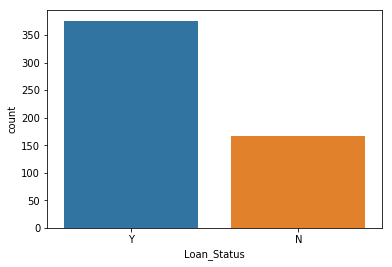

In [11]:
#distribution of the target column
ax = sns.countplot(x="Loan_Status", data=data)

In [12]:
data['Loan_Status'].value_counts()

Y    376
N    166
Name: Loan_Status, dtype: int64

In [13]:
data['Loan_Status'].replace('N',0,inplace=True)
data['Loan_Status'].replace('Y',1,inplace=True)

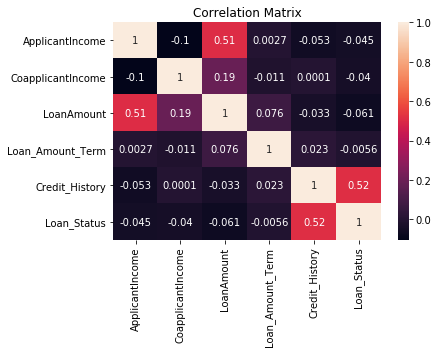

In [14]:
plt.title('Correlation Matrix')
sns.heatmap(data.corr(),annot=True)

loan status which is our target variable only correlates with credit history so all other columns
here will be droped

In [15]:
data=data.drop(["Loan_ID","Loan_Amount_Term","LoanAmount","CoapplicantIncome","ApplicantIncome"],axis=1)
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1


In [16]:
#change columns of type object
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

data['Dependents']=label.fit_transform(data['Dependents'])
data['Property_Area']=label.fit_transform(data['Property_Area'])
data=pd.get_dummies(data)
data.head(5)


,Dependents,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,1.0,2,1,0,1,1,0,1,0,1,0
1,1,1.0,0,0,0,1,0,1,1,0,1,0
2,0,1.0,2,1,0,1,0,1,1,0,0,1
3,0,1.0,2,1,0,1,0,1,0,1,1,0
4,0,1.0,2,1,0,1,1,0,1,0,1,0


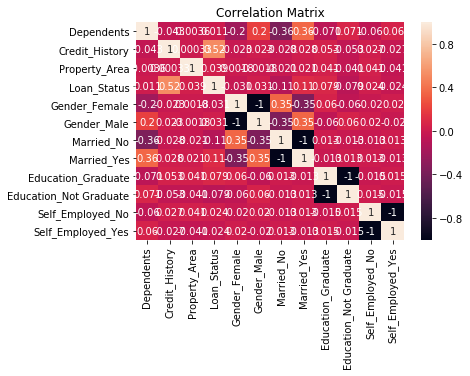

In [17]:
plt.title('Correlation Matrix')
sns.heatmap(data.corr(),annot=True)

In [19]:
X=data.drop("Loan_Status",axis=1)
y=data['Loan_Status']

In [21]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   stratify = y,
                                                   test_size = 0.30)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((379, 11), (379,), (163, 11), (163,))

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
#define model
ml = DecisionTreeClassifier(random_state=1)
# Fit model
ml.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [32]:
predictions=ml.predict(X_test)
print(predictions)

[1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0]


In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confm=confusion_matrix(y_test,predictions)
confm

array([[20, 30],
       [16, 97]], dtype=int64)

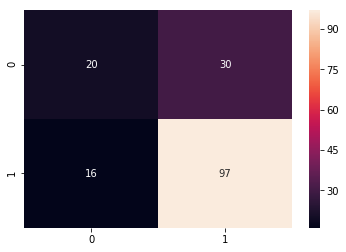

In [36]:
#confusion matrix plot
sns.heatmap(confm, annot=True)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7177914110429447